In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ringkasan EDA yang kami buat terangkum dalam poin-poin dibawah

1. Top 5 Brands, yang memiliki harga tertinggi
>>- a. Warna Sepatu yang banyak terjual berdasarkan Top 5 Brands
>>- b. Warna dan Top 5 Brand yang memiliki harga tertinggi
>>- c. Cek berapa banyak sepatu dengan "price_max" diatas rata-rata
>>- d. Membandingkan jumlah sepatu yang terjual dengan "price max" diatas rata-rata vs "price max" dibawah rata-rata
2. Warna sepatu yang banyak terjual berdasarkan Seluruh Brand
3. Cek berapa banyak sepatu yang terjual dengan harga diskon berdasarakan Brand
4. Cek berapa banyak sepatu yang terjual dengan harga diskon berdasarakan Warna Sepatu
5.  Cek Korelasi Diskon dengan Price Max

In [2]:
df = pd.read_csv('Datafiniti_Womens_Shoes.csv')

In [3]:
df.head()

,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean,...,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,weight
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,NaN,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,"Silver,Cream Watercolor Floral",NaN,NaN,...,Overstock.com,NaN,NaN,NaN,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311,NaN
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Walmart.com,NaN,NaN,Standard,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...","Shoes,Shoes",Black,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903,NaN
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,Grey,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Walmart.com,NaN,NaN,Expedited,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045958,NaN


In [4]:
df.dtypes

id                      object
dateAdded               object
dateUpdated             object
asins                   object
brand                   object
categories              object
primaryCategories       object
colors                  object
dimension               object
ean                    float64
imageURLs               object
keys                    object
manufacturer            object
manufacturerNumber      object
name                    object
prices.amountMax       float64
prices.amountMin       float64
prices.availability     object
prices.color            object
prices.condition        object
prices.currency         object
prices.dateAdded        object
prices.dateSeen         object
prices.isSale             bool
prices.merchant         object
prices.offer            object
prices.returnPolicy    float64
prices.shipping         object
prices.size             object
prices.sourceURLs       object
sizes                   object
sourceURLs              object
upc     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  object 
 1   dateAdded            10000 non-null  object 
 2   dateUpdated          10000 non-null  object 
 3   asins                3 non-null      object 
 4   brand                10000 non-null  object 
 5   categories           10000 non-null  object 
 6   primaryCategories    10000 non-null  object 
 7   colors               2631 non-null   object 
 8   dimension            117 non-null    object 
 9   ean                  671 non-null    float64
 10  imageURLs            10000 non-null  object 
 11  keys                 10000 non-null  object 
 12  manufacturer         527 non-null    object 
 13  manufacturerNumber   2482 non-null   object 
 14  name                 10000 non-null  object 
 15  prices.amountMax     10000 non-null  

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  object 
 1   dateAdded            10000 non-null  object 
 2   dateUpdated          10000 non-null  object 
 3   asins                3 non-null      object 
 4   brand                10000 non-null  object 
 5   categories           10000 non-null  object 
 6   primaryCategories    10000 non-null  object 
 7   colors               2631 non-null   object 
 8   dimension            117 non-null    object 
 9   ean                  671 non-null    float64
 10  imageURLs            10000 non-null  object 
 11  keys                 10000 non-null  object 
 12  manufacturer         527 non-null    object 
 13  manufacturerNumber   2482 non-null   object 
 14  name                 10000 non-null  object 
 15  prices.amountMax     10000 non-null  

In [8]:
dataDesc= []

for i in df.columns:
    dataDesc.append([
        i, 
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(1).values
    ])

In [9]:
pd.DataFrame(dataDesc, columns=[
    "Data features", 
    "Data types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data features,Data types,Null,Null Percentage,Unique,Unique Sample
0,id,object,0,0.00,653,[AWDG1pI4uC1rwyj_lPRB]
1,dateAdded,object,0,0.00,440,[2018-04-06T18:33:52Z]
2,dateUpdated,object,0,0.00,495,[2018-01-21T05:29:21Z]
3,asins,object,9997,99.97,1,[B016GSDNVM]
4,brand,object,0,0.00,129,[nyla]
5,categories,object,0,0.00,207,"[Womens,Shoes,Athletic Shoes,Sneakers,Nike,Clo..."
6,primaryCategories,object,0,0.00,2,[Shoes]
7,colors,object,7369,73.69,219,"[Highrisewhite,Flamingo Pinkwhite,Whitewhite,B..."
8,dimension,object,9883,98.83,19,[12.0 in x 11.0 in x 6.0 in]
9,ean,float64,9329,93.29,45,[727679000000.0]


In [10]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'asins', 'brand', 'categories',
       'primaryCategories', 'colors', 'dimension', 'ean', 'imageURLs', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'prices.amountMax',
       'prices.amountMin', 'prices.availability', 'prices.color',
       'prices.condition', 'prices.currency', 'prices.dateAdded',
       'prices.dateSeen', 'prices.isSale', 'prices.merchant', 'prices.offer',
       'prices.returnPolicy', 'prices.shipping', 'prices.size',
       'prices.sourceURLs', 'sizes', 'sourceURLs', 'upc', 'weight'],
      dtype='object')

## Drop kolom yang tidak digunakan

In [11]:
df.drop(columns=['asins','primaryCategories','colors','dimension','ean','imageURLs','keys','manufacturer','manufacturerNumber','name',
                 'prices.availability', 'prices.condition', 'prices.dateAdded', 'prices.dateSeen','prices.merchant','prices.offer', 
                 'prices.returnPolicy', 'prices.shipping','prices.sourceURLs', 'sizes', 'sourceURLs', 'upc', 'weight'], inplace=True)

In [12]:
df.head()

,id,dateAdded,dateUpdated,brand,categories,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.isSale,prices.size
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",55.99,55.99,UWomens M Regular,USD,False,S
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",47.00,35.25,Grey,USD,True,6
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",35.25,35.25,Grey,USD,False,6
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",24.75,24.75,Black,USD,False,6
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",33.00,30.39,Grey,USD,True,6


In [13]:
#merapikan nama kolom
df = df.rename(columns={'prices.amountMax': 'price_max', 'prices.amountMin': 'price_min', 
                        'prices.currency':'currency', 'prices.color':'color', 'prices.size':'size',
                      'prices.isSale':'isSale' })
df.head(5)

,id,dateAdded,dateUpdated,brand,categories,price_max,price_min,color,currency,isSale,size
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",55.99,55.99,UWomens M Regular,USD,False,S
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",47.00,35.25,Grey,USD,True,6
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",35.25,35.25,Grey,USD,False,6
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",24.75,24.75,Black,USD,False,6
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",33.00,30.39,Grey,USD,True,6


In [14]:
df.isna().sum() #cek missing value pada kolom yang digunakan

id             0
dateAdded      0
dateUpdated    0
brand          0
categories     0
price_max      0
price_min      0
color          0
currency       0
isSale         0
size           0
dtype: int64

In [15]:
# mencari harga rata-rata sepatu 
df['price_avg'] = round(((df['price_min'] + df['price_max']) / 2),2)

In [16]:
df.head()

,id,dateAdded,dateUpdated,brand,categories,price_max,price_min,color,currency,isSale,size,price_avg
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",55.99,55.99,UWomens M Regular,USD,False,S,55.99
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",47.00,35.25,Grey,USD,True,6,41.12
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",35.25,35.25,Grey,USD,False,6,35.25
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",24.75,24.75,Black,USD,False,6,24.75
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",33.00,30.39,Grey,USD,True,6,31.70


## BRAND NAME CLEANING

In [17]:
df['brand'].unique()

array(['Naturalizer', 'MUK LUKS', 'Soft Ones', 'muk luks', 'Sloggers',
       "Dr. Scholl's", 'Genuine Dickies', 'Mo Mo', 'SKECHERS',
       'lc lauren conrad', 'FOREVER YOUNG', 'Unbranded', 'Faded Glory',
       'qupid', 'olivia miller', 'Victoria K.', 'Keds', 'herstar',
       'Earth Spirit', 'Unique Bargains', 'lifestride',
       'naturalsoul by naturalizer', 'Lugz', 'lugz',
       'style charles by charles david', 'nyla', 'Daniel Green', 'corkys',
       'IB Non-Slip', 'Silver Lilly', 'ELLIE SHOES', 'SoftWalk',
       'Brinley Co.', 'MLB', 'easy street', 'Danskin Now',
       'forever collectibles', 'Carrini', 'Riverberry',
       'journee collection', 'eastland', 'so', 'dolce by mojo moxy',
       'under armour', 'koolaburra by ugg', 'skechers', 'puma', 'adidas',
       'new balance', 'rampage', 'vans', 'croft barrow', 'candies',
       'simply vera vera wang', 'apt. 9', 'jennifer lopez',
       'sonoma goods for life', 'soft style by hush puppies', 'keds',
       'Laredo', 'rock

In [18]:
df['brand'] = df['brand'].str.lower()

In [19]:
df['brand'].unique()

array(['naturalizer', 'muk luks', 'soft ones', 'sloggers', "dr. scholl's",
       'genuine dickies', 'mo mo', 'skechers', 'lc lauren conrad',
       'forever young', 'unbranded', 'faded glory', 'qupid',
       'olivia miller', 'victoria k.', 'keds', 'herstar', 'earth spirit',
       'unique bargains', 'lifestride', 'naturalsoul by naturalizer',
       'lugz', 'style charles by charles david', 'nyla', 'daniel green',
       'corkys', 'ib non-slip', 'silver lilly', 'ellie shoes', 'softwalk',
       'brinley co.', 'mlb', 'easy street', 'danskin now',
       'forever collectibles', 'carrini', 'riverberry',
       'journee collection', 'eastland', 'so', 'dolce by mojo moxy',
       'under armour', 'koolaburra by ugg', 'puma', 'adidas',
       'new balance', 'rampage', 'vans', 'croft barrow', 'candies',
       'simply vera vera wang', 'apt. 9', 'jennifer lopez',
       'sonoma goods for life', 'soft style by hush puppies', 'laredo',
       'rocky 4eursole', 'ryka', 'dr. scholls', 'fergalicio

In [20]:
df['brand'].nunique()

116

In [21]:
#cleaning brand name

brand_map = { "adidas outdoor" : "adidas", "dr. scholls" : "dr. scholl's", "naturalsoul by naturalizer" : "natulizer",
             "style charles by charles david" : "charles david", "soft style by hush puppies" : "hush puppies", "brinley co. collection" : "brinley co.",
             "betula by birkenstock" : "birkenstock", "dolce by mojo moxy" : "mojo moxy", "koolaburra by ugg" : "ugg", "a2 by aerosoles" : "aerosoles",
             "kisses by 2 lips too" : "2 lips too"
}

df['brand_clean'] = df['brand'].replace(brand_map)
df['brand_clean'].head()

0    naturalizer
1       muk luks
2       muk luks
3       muk luks
4       muk luks
Name: brand_clean, dtype: object

In [22]:
df['brand_clean'].nunique()

110

In [23]:
df['brand_clean'].value_counts()

journee collection    2182
lifestride            1593
aerosoles              670
easy street            585
charles david          478
                      ... 
otzshoes                 1
olivia miller            1
carrini                  1
nyla                     1
unique bargains          1
Name: brand_clean, Length: 110, dtype: int64

In [24]:
brand_sort = sorted(df.brand_clean)
set(brand_sort)

{'2 lips too',
 'adidas',
 'aerosoles',
 'altra',
 'andrew geller',
 'apt. 9',
 "arc'teryx",
 'asics',
 'astral',
 'birkenstock',
 'bogs',
 'brinley co.',
 'brooks',
 'candies',
 'carrini',
 'chaco',
 'charles david',
 'clarks',
 'corkys',
 'croft barrow',
 'daniel green',
 'danskin now',
 'dansko',
 "dr. scholl's",
 'earth spirit',
 'eastland',
 'easy street',
 'ellie shoes',
 'faded glory',
 'fergalicious',
 'fila',
 'forever collectibles',
 'forever young',
 'free people',
 'frye',
 'genuine dickies',
 'henry ferrera',
 'herstar',
 'hoka one one',
 'hush puppies',
 'ib non-slip',
 'inov 8',
 'jennifer lopez',
 'journee collection',
 'k-swiss',
 'kaanas',
 'keds',
 'keen',
 'la sportiva',
 'laredo',
 'lc lauren conrad',
 'lifestride',
 'lowa',
 'lugz',
 'madden nyc',
 'mammut',
 'merrell',
 'mlb',
 'mo mo',
 'mojo moxy',
 'muk luks',
 'native shoes',
 'natulizer',
 'naturalizer',
 'new balance',
 'nike',
 'nyla',
 'olivia miller',
 'olukai',
 'on footwear',
 'otzshoes',
 'puma',
 'qu

In [25]:
## lowercase font

In [26]:
df['color'] = df['color'].str.lower()


In [27]:
df.head()

,id,dateAdded,dateUpdated,brand,categories,price_max,price_min,color,currency,isSale,size,price_avg,brand_clean
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",55.99,55.99,uwomens m regular,USD,False,S,55.99,naturalizer
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,muk luks,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",47.00,35.25,grey,USD,True,6,41.12,muk luks
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,muk luks,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",35.25,35.25,grey,USD,False,6,35.25,muk luks
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,muk luks,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",24.75,24.75,black,USD,False,6,24.75,muk luks
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,muk luks,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",33.00,30.39,grey,USD,True,6,31.70,muk luks


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


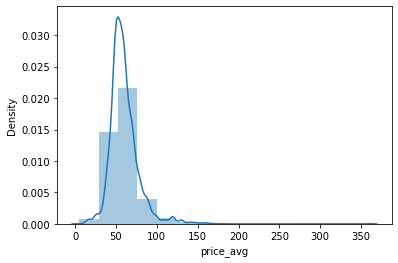

In [28]:
## Distribusion of avrg price
sns.distplot(df['price_avg'], bins=15)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


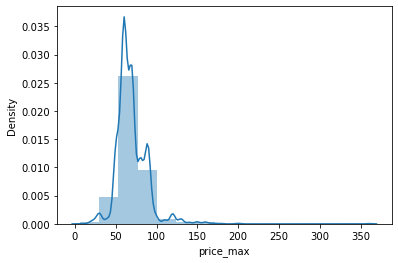

In [29]:
## Distribusion of avrg price
sns.distplot(df['price_max'], bins=15)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


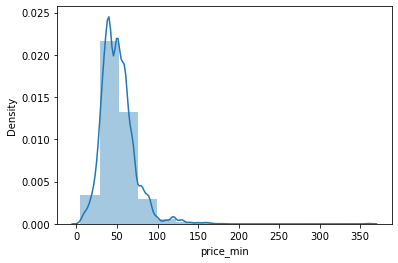

In [30]:
## Distribusion of avrg price
sns.distplot(df['price_min'], bins=15)
plt.show()

## 1. Top 5 Brands berdasarkan Merk yang memiliki harga tertinggi

In [31]:
df_top5_brand = df[['brand_clean', 'price_max']].groupby('brand_clean', as_index=False).agg('mean').sort_values('price_max',ascending=False)
df_top5_brand = df_top5_brand.head(5)
df_top5_brand

,brand_clean,price_max
74,red wing,345.95
52,lowa,199.95
33,free people,178.00
6,arc'teryx,170.00
82,scarpa,169.70


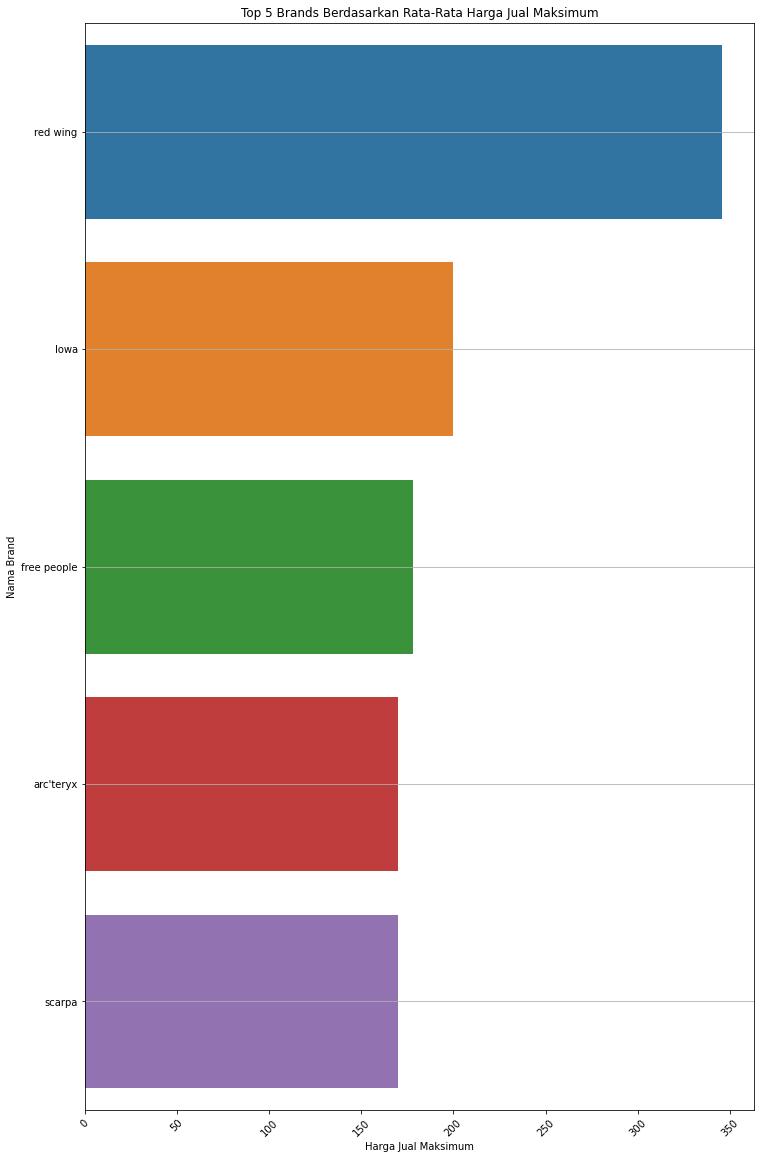

In [32]:
## top 5 Brands berdasarkan Merk yang harga tinggi
plt.figure(figsize=(12,20))
sns.barplot(x='price_max', y='brand_clean', data=df_top5_brand)
plt.title('Top 5 Brands Berdasarkan Rata-Rata Harga Jual Maksimum')
plt.xlabel('Harga Jual Maksimum')
plt.xticks(rotation=45)
plt.ylabel('Nama Brand')
plt.grid(axis='y')
plt.show()

In [33]:
# filter tabel utama (df) untuk mendapatkan semua data di tabel utama dan hanya top 5 brand

df_top5_brand_all = df[df.brand_clean.isin(df_top5_brand.brand_clean)]
df_top5_brand_all


,id,dateAdded,dateUpdated,brand,categories,price_max,price_min,color,currency,isSale,size,price_avg,brand_clean
9641,AWKb6yR4Hh53nbDRIhMA,2018-04-06T16:46:49Z,2018-07-03T20:04:17Z,arc'teryx,"Women's Trail Running Shoes,Women's Footwear,W...",170.00,110.50,blue nights/coral,USD,True,US 9.5/UK 8.0,140.25,arc'teryx
9642,AWKb6yR4Hh53nbDRIhMA,2018-04-06T16:46:49Z,2018-07-03T20:04:17Z,arc'teryx,"Women's Trail Running Shoes,Women's Footwear,W...",170.00,170.00,twilight/mauveine,USD,False,US 9.0/UK 7.5,170.00,arc'teryx
9643,AWKb6yR4Hh53nbDRIhMA,2018-04-06T16:46:49Z,2018-07-03T20:04:17Z,arc'teryx,"Women's Trail Running Shoes,Women's Footwear,W...",170.00,110.50,caraibes/blue nights,USD,True,US 8.5/UK 7.0,140.25,arc'teryx
9650,AWKb6Bl6Hh53nbDRIg6w,2018-04-06T16:45:39Z,2018-07-02T00:19:25Z,scarpa,"Women's Trail Running Shoes,Women's Footwear,W...",168.95,76.03,gray/sky,USD,True,37,122.49,scarpa
9701,AWOC3uJ0YSSHbkXw0uzL,2018-05-21T13:17:39Z,2018-06-22T12:17:10Z,red wing,"Women's Red Wing Shoes,Women's Clothing,Women'...",359.95,359.95,black boundary,USD,False,7.5,359.95,red wing
9702,AWOC3uJ0YSSHbkXw0uzL,2018-05-21T13:17:39Z,2018-06-22T12:17:10Z,red wing,"Women's Red Wing Shoes,Women's Clothing,Women'...",359.95,359.95,mahogany oro-iginal leather,USD,False,7,359.95,red wing
9703,AWOC3uJ0YSSHbkXw0uzL,2018-05-21T13:17:39Z,2018-06-22T12:17:10Z,red wing,"Women's Red Wing Shoes,Women's Clothing,Women'...",359.95,359.95,black boundary,USD,False,9.5,359.95,red wing
9704,AWOC3uJ0YSSHbkXw0uzL,2018-05-21T13:17:39Z,2018-06-22T12:17:10Z,red wing,"Women's Red Wing Shoes,Women's Clothing,Women'...",359.95,359.95,black boundary,USD,False,10,359.95,red wing
9717,AWOC3cR9YSSHbkXw0uGE,2018-05-21T13:17:40Z,2018-05-21T13:17:40Z,red wing,"Women's Clothing,Women's Shoes,Women's Red Win...",289.95,289.95,oro legacy leather,USD,False,6.5,289.95,red wing
9741,AWKb5_u2Hh53nbDRIg6L,2018-04-06T16:47:08Z,2018-04-10T19:42:17Z,scarpa,"Women's Footwear,Women's Running Shoes,Women's...",169.95,118.96,clematis/coral red,USD,True,38.5,144.45,scarpa


# 1a. Warna Sepatu yang banyak terjual berdasarkan Top 5 Brands

In [34]:
df_top5_brand_all.groupby('color')['brand_clean'].value_counts().sort_values(ascending=False).head(15).to_frame()


,,brand_clean
color,brand_clean,
stone/mint,lowa,6
black boundary,red wing,3
clematis/coral red,scarpa,3
tan,free people,2
blue nights/coral,arc'teryx,1
caraibes/blue nights,arc'teryx,1
gray/berry,lowa,1
gray/sky,scarpa,1
mahogany oro-iginal leather,red wing,1


Dari tabel diatas, dapat disimpulkan bahwa warna dalam range abu-abu ke biru ( grey - aqua) adalah warna yang banyak terjual untuk brand dengan harga tinggi

# 1b. Warna dan Top 5 Brand yang memiliki harga tertinggi

In [35]:
#warna dan brand yang memiliki harga tertinggi

df_top5_brand_all[['brand_clean','color','price_max']].groupby(['color','brand_clean'], as_index=False).agg('mean').sort_values('price_max',ascending=False).head(15)

,color,brand_clean,price_max
0,black boundary,red wing,359.95
6,mahogany oro-iginal leather,red wing,359.95
7,oro legacy leather,red wing,289.95
8,stone/mint,lowa,199.95
4,gray/berry,lowa,199.95
9,tan,free people,178.00
1,blue nights/coral,arc'teryx,170.00
2,caraibes/blue nights,arc'teryx,170.00
10,twilight/mauveine,arc'teryx,170.00
3,clematis/coral red,scarpa,169.95


Jika tabel 1b diatas di bandingkan dengan tabel 1a, 
maka dapat kita lihat bahwa warna dan merk sepatu termahal tidak berada dalam daftar sepatu yang banyak terjual.
Hal tersebut mengartikan bahwa sepatu dengan harga tertinggi belum tentu banyak diminati pembeli wanita

# 1c. cek berapa banyak sepatu dengan "price_max" diatas rata-rata

In [36]:
# mencari data dengan "price_max" di atas rata-rata
df_top5_aboveavg = df_top5_brand_all.loc[df_top5_brand_all['price_max'] > df_top5_brand_all['price_max'].mean()]
df_top5_aboveavg

,id,dateAdded,dateUpdated,brand,categories,price_max,price_min,color,currency,isSale,size,price_avg,brand_clean
9701,AWOC3uJ0YSSHbkXw0uzL,2018-05-21T13:17:39Z,2018-06-22T12:17:10Z,red wing,"Women's Red Wing Shoes,Women's Clothing,Women'...",359.95,359.95,black boundary,USD,False,7.5,359.95,red wing
9702,AWOC3uJ0YSSHbkXw0uzL,2018-05-21T13:17:39Z,2018-06-22T12:17:10Z,red wing,"Women's Red Wing Shoes,Women's Clothing,Women'...",359.95,359.95,mahogany oro-iginal leather,USD,False,7,359.95,red wing
9703,AWOC3uJ0YSSHbkXw0uzL,2018-05-21T13:17:39Z,2018-06-22T12:17:10Z,red wing,"Women's Red Wing Shoes,Women's Clothing,Women'...",359.95,359.95,black boundary,USD,False,9.5,359.95,red wing
9704,AWOC3uJ0YSSHbkXw0uzL,2018-05-21T13:17:39Z,2018-06-22T12:17:10Z,red wing,"Women's Red Wing Shoes,Women's Clothing,Women'...",359.95,359.95,black boundary,USD,False,10,359.95,red wing
9717,AWOC3cR9YSSHbkXw0uGE,2018-05-21T13:17:40Z,2018-05-21T13:17:40Z,red wing,"Women's Clothing,Women's Shoes,Women's Red Win...",289.95,289.95,oro legacy leather,USD,False,6.5,289.95,red wing


In [37]:
# jumlah sepatu terjual berdasarkan top 20 brand yang memiliki "price_max" diatas rata-rata

df_top5_aboveavg['brand_clean'].value_counts().to_frame()

,brand_clean
red wing,5


In [38]:
## jumlah sepatu terjual berdasarkan top 20 brand yang memiliki "price_max" diatas rata-rata - dan di kelompokan berdasarkan warna

df_top5_aboveavg.groupby('color')['brand_clean'].value_counts().sort_values(ascending=False).to_frame()

,,brand_clean
color,brand_clean,
black boundary,red wing,3
mahogany oro-iginal leather,red wing,1
oro legacy leather,red wing,1


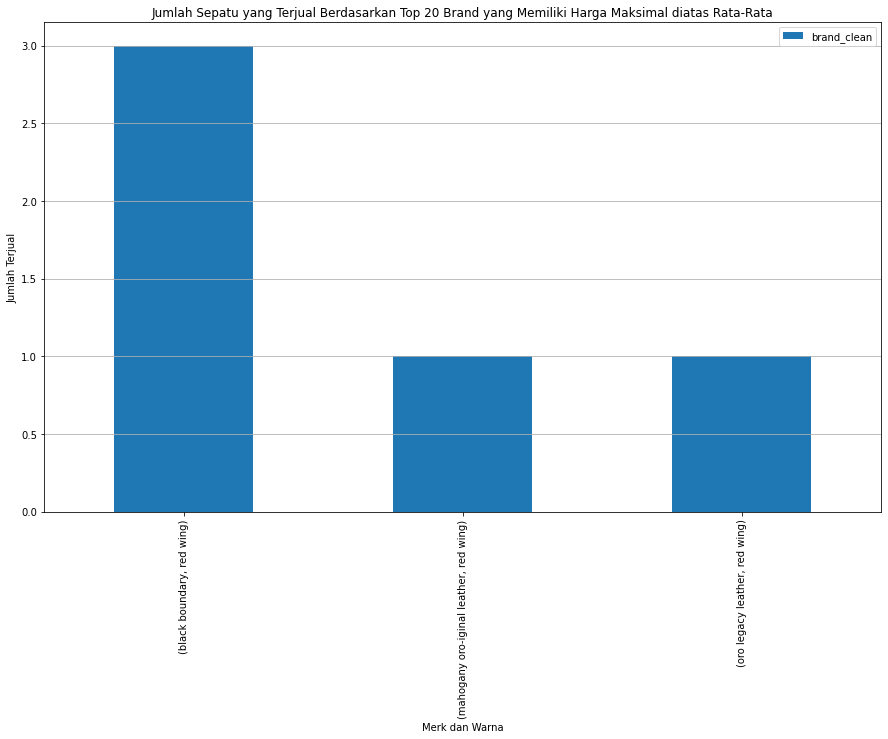

In [39]:
df_top5_aboveavg.groupby('color')['brand_clean'].value_counts().sort_values(ascending=False).to_frame().plot(kind='bar',figsize=(15,9))
plt.title('Jumlah Sepatu yang Terjual Berdasarkan Top 20 Brand yang Memiliki Harga Maksimal diatas Rata-Rata')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.xlabel('Merk dan Warna')
plt.ylabel('Jumlah Terjual')
plt.show()

# 1d. Membandingkan jumlah sepatu yang terjual dengan "price max" diatas rata-rata vs "price max" dibawah rata-rata

In [40]:
df_top5_beloweavg = df_top5_brand_all.loc[df_top5_brand_all['price_max'] < df_top5_brand_all['price_max'].mean()]
df_top5_beloweavg.count()

id             16
dateAdded      16
dateUpdated    16
brand          16
categories     16
price_max      16
price_min      16
color          16
currency       16
isSale         16
size           16
price_avg      16
brand_clean    16
dtype: int64

In [41]:
df_top5_aboveavg.count()

id             5
dateAdded      5
dateUpdated    5
brand          5
categories     5
price_max      5
price_min      5
color          5
currency       5
isSale         5
size           5
price_avg      5
brand_clean    5
dtype: int64

Kita dapat menarik kesimpulan bahwa sepatu yang terjual dengan "price_max" diatas rata-rata LEBIH SEDIKIT dibanding sepatu yang terjual dengan "price_max" dibawah rata-rata dalam kategori Top 5 Brand harga tertinggi

# 2 Warna sepatu yang banyak terjual berdasarkan Seluruh Brand

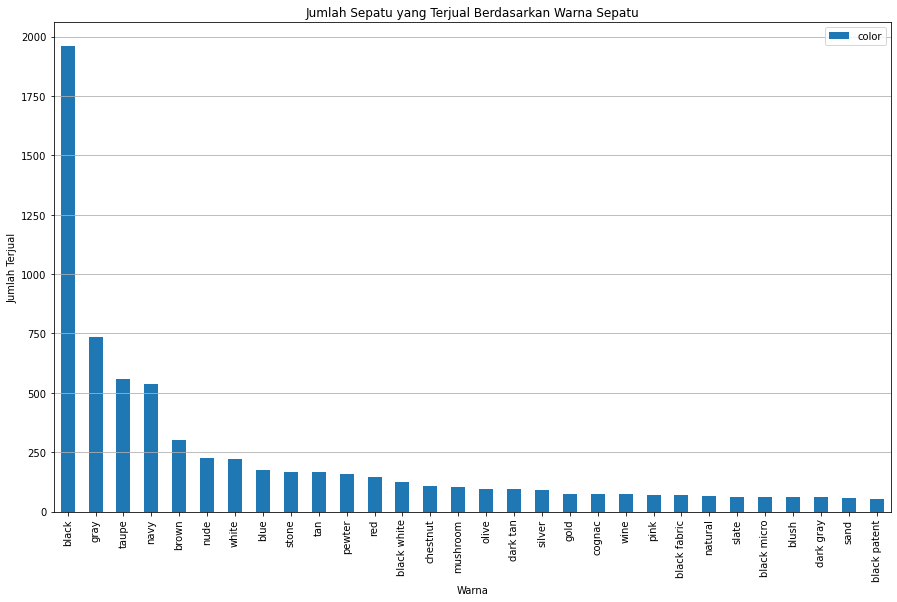

In [42]:
df['color'].value_counts().to_frame().head(30).plot(kind='bar',figsize=(15,9))
plt.title('Jumlah Sepatu yang Terjual Berdasarkan Warna Sepatu')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.xlabel('Warna')
plt.ylabel('Jumlah Terjual')
plt.show()

Warna Hitam (Black) adalah warna sepatu yang banyak terjual untuk wanita diikuti dengan warna Abu-Abu (Gray) dan Coklat Tua (Taupe)

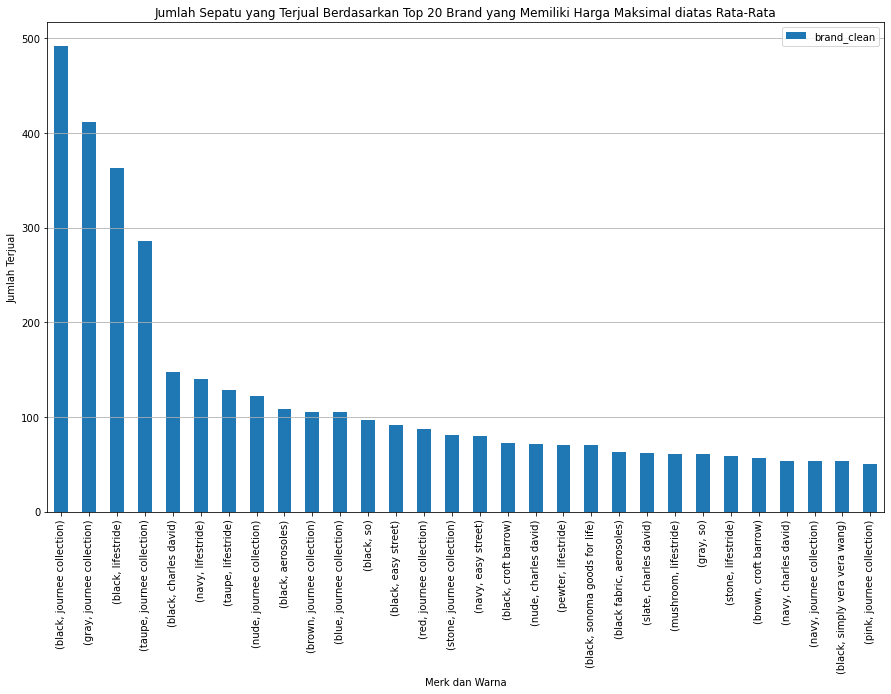

In [43]:
## Warna sepatu yang banyak terjual berdasarkan Brand
df.groupby('color')['brand_clean'].value_counts().sort_values(ascending=False).head(30).to_frame().plot(kind='bar',figsize=(15,9))
plt.title('Jumlah Sepatu yang Terjual Berdasarkan Top 20 Brand yang Memiliki Harga Maksimal diatas Rata-Rata')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.xlabel('Merk dan Warna')
plt.ylabel('Jumlah Terjual')
plt.show()

Journee Collection adalah brand yang sangat digemari oleh wanita ketika belanja online, diikuti dengan brand Lifestride dan Charles David. 
Warna favorit untuk sepatu ini tetap Hitam, Abu-abu dan Cokelat Tua

In [44]:
#raw data dari grafik diatas
df.groupby('color')['brand_clean'].value_counts().sort_values(ascending=False).head(30).to_frame()

,,brand_clean
color,brand_clean,
black,journee collection,492
gray,journee collection,411
black,lifestride,363
taupe,journee collection,286
black,charles david,147
navy,lifestride,140
taupe,lifestride,129
nude,journee collection,122
black,aerosoles,108


# 3. Cek berapa banyak sepatu yang terjual dengan harga diskon berdasarakan Brand

In [45]:
# membuat table sepatu yang terjual dengan harga diskon
Discount_Sold = df.loc[df['isSale'] == True]
Discount_Sold

,id,dateAdded,dateUpdated,brand,categories,price_max,price_min,color,currency,isSale,size,price_avg,brand_clean
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,muk luks,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",47.00,35.25,grey,USD,True,6,41.12,muk luks
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,muk luks,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",33.00,30.39,grey,USD,True,6,31.70,muk luks
5,AVpg91ziilAPnD_xziOo,2017-01-09T19:38:58Z,2018-10-23T21:26:11Z,soft ones,"Womens Shoes,Clothing,Women's Shoes,Baby & Kid...",14.00,7.90,brown tweed,USD,True,5,10.95,soft ones
8,AVpfLXyhilAPnD_xWmNc,2017-01-07T20:51:17Z,2018-01-03T05:22:07Z,muk luks,"Clothing,Shoes,Women's Shoes,All Women's Shoes",59.00,39.88,navy,USD,True,6,49.44,muk luks
9,AVpfeWdJ1cnluZ0-lXYU,2017-01-07T20:51:22Z,2018-01-30T06:18:34Z,muk luks,"Clothing,Shoes,Women's Shoes,Women's Winter Bo...",59.00,47.99,brown,USD,True,6,53.50,muk luks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AWKcCm-RHh53nbDRIh1_,2018-04-06T17:33:30Z,2018-04-06T21:02:04Z,asics,"Women's Footwear,Women's Running Shoes,Women's...",119.95,89.96,silver/pistachio/pink,USD,True,7.5,104.96,asics
9996,AWKcEq-dHh53nbDRIiES,2018-04-06T17:33:29Z,2018-04-06T21:02:04Z,asics,"Women's Footwear,Women's Running Shoes,Women's...",119.95,77.97,indigo blue/silver/prune,USD,True,7,98.96,asics
9997,AWKb5jmLYSSHbkXwyzBA,2018-04-06T16:46:35Z,2018-04-06T21:02:01Z,kaanas,"Women's Footwear,Women's Casual Boots & Shoes,...",128.95,64.47,mauve,USD,True,11,96.71,kaanas
9998,AWKcEIInYSSHbkXwy0SA,2018-04-06T17:33:30Z,2018-04-06T21:01:53Z,nike,"Women's Footwear,Women's Running Shoes,Women's...",119.95,89.96,armory blue/armory navy-cirrus blue,USD,True,6.5,104.96,nike


In [46]:
Discount_Sold.groupby('isSale')['brand_clean'].value_counts().sort_values(ascending=False).head(5).to_frame()

brand_clean
isSale brand_clean             
True   brinley co.           24
       adidas                17
       salomon               14
       muk luks              13
       nike                  13

# 4. Cek berapa banyak sepatu yang terjual dengan harga diskon berdasarakan Warna Sepatu

In [47]:
Discount_Sold.groupby('isSale')['color'].value_counts().sort_values(ascending=False).head(5).to_frame()

color
isSale color            
True   black          22
       navy            7
       stone/mint      6
       brown           5
       grey            5

# 5. Cek Korelasi Diskon dengan Price Max

In [48]:
Discount_Sold[['isSale', 'brand_clean','color','price_max','price_avg']].sort_values('price_max',ascending=False).head(30)

,isSale,brand_clean,color,price_max,price_avg
9994,True,lowa,stone/mint,199.95,144.96
9993,True,lowa,stone/mint,199.95,144.96
9992,True,lowa,stone/mint,199.95,144.96
9991,True,lowa,stone/mint,199.95,144.96
9990,True,lowa,stone/mint,199.95,144.96
9989,True,lowa,stone/mint,199.95,144.96
9988,True,lowa,gray/berry,199.95,154.96
9775,True,frye,fatigue,177.95,133.46
9774,True,frye,fatigue,177.95,133.46
9773,True,frye,wood,177.95,137.91


In [49]:
df.corr(method='spearman', min_periods=1)

,price_max,price_min,isSale,price_avg
price_max,1.000000,0.509188,0.094099,0.838391
price_min,0.509188,1.000000,0.074695,0.878916
isSale,0.094099,0.074695,1.000000,0.090661
price_avg,0.838391,0.878916,0.090661,1.000000


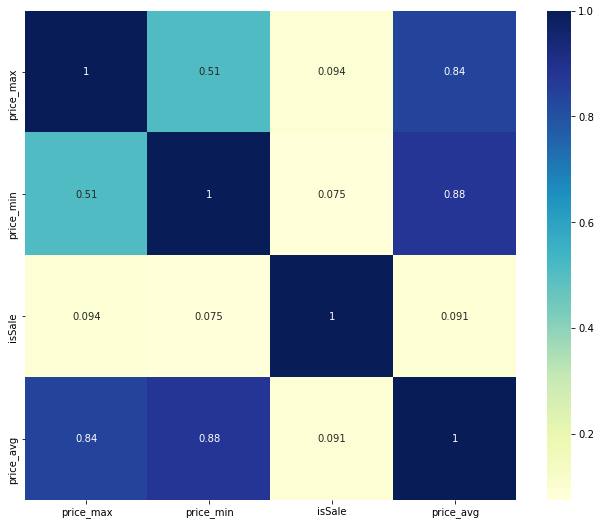

In [50]:
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(method='spearman', min_periods=1),annot=True, cmap="YlGnBu")
plt.show()

Dari gambar Heatmap diatas, dapat disimpulkan bahwa Sepatu yang didiskon memiliki korelasi yang rendah harga maksimum dan harga minimum dari sepatu tersebut.